In [1]:
import pandas as pd
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras import layers,regularizers
import time
import tensorboard

In [2]:
import numpy as np

In [3]:
cd C:\Users\Testys\Documents\M.L Space\New folder

C:\Users\Testys\Documents\M.L Space\New folder


In [4]:
train = pd.read_csv("diabetes.csv")

In [5]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
train.shape

(768, 9)

In [7]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

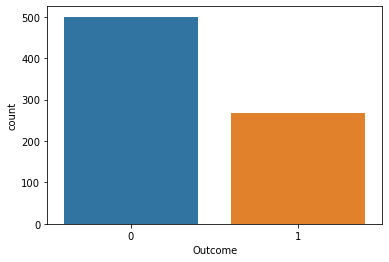

In [8]:
sns.countplot(x= train.Outcome)

In [9]:
import sklearn 
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

In [10]:
X = train.drop('Outcome', axis= 1)
y= train['Outcome']

In [11]:
scale = RobustScaler()
s_X = scale.fit_transform(X, y) 

In [12]:
#s_X

In [13]:
#norm = Normalizer()
#norm_X = norm.fit_transform(s_X)

In [14]:
train_X,test_X,train_y, test_y = train_test_split(s_X, y, test_size= 0.2, random_state = 42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size= 0.2, random_state= 42)

In [16]:
input_shape =X_train.shape[1]

In [17]:
model = tf.keras.Sequential()
model.add(layers.Dense(units= 30, activation= "relu" , input_shape = [input_shape])),
model.add(layers.Dense(30, activation= "relu",)),
#model.add(layers.Dense(32, activation= "relu",)),
model.add(layers.Dense(1, activation= "sigmoid"))

In [18]:
model.compile(optimizer= "adam",
             loss= "binary_crossentropy",
             metrics= ["accuracy"])

In [19]:
history= model.fit(X_train, 
         y_train,
         epochs = 20,
         batch_size = 128,
         validation_data= (X_val, y_val))

Epoch 1/20
4/4 [==============================] - 2s 146ms/step - loss: 0.6852 - accuracy: 0.5703 - val_loss: 0.6842 - val_accuracy: 0.6260
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 0.6690 - accuracy: 0.6680 - val_loss: 0.6696 - val_accuracy: 0.6667
Epoch 3/20
4/4 [==============================] - 0s 22ms/step - loss: 0.6545 - accuracy: 0.7088 - val_loss: 0.6563 - val_accuracy: 0.7073
Epoch 4/20
4/4 [==============================] - 0s 25ms/step - loss: 0.6420 - accuracy: 0.7128 - val_loss: 0.6436 - val_accuracy: 0.6992
Epoch 5/20
4/4 [==============================] - 0s 32ms/step - loss: 0.6295 - accuracy: 0.7189 - val_loss: 0.6315 - val_accuracy: 0.7073
Epoch 6/20
4/4 [==============================] - 0s 25ms/step - loss: 0.6176 - accuracy: 0.7189 - val_loss: 0.6196 - val_accuracy: 0.7073
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 0.6066 - accuracy: 0.7230 - val_loss: 0.6079 - val_accuracy: 0.7073
Epoch 8/20
4/4 [==========

In [20]:
import matplotlib.pyplot as plt

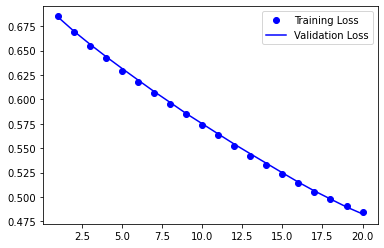

In [21]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation Loss')
plt.legend()
plt.show()

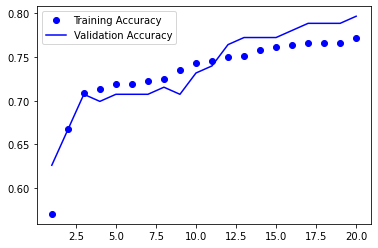

In [22]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.legend()
plt.show()


In [23]:
preds=model.predict(X_val)

In [24]:
final= []
for i in preds:
    if i < 0.45:
        final.append(0)
    else:
        final.append(1)


In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score(final, y_val)

0.6923076923076924

In [27]:
pred1= model.predict(test_X)

In [28]:
final1= []
for i in pred1:
    if i < 0.45:
        final1.append(0)
    else:
        final1.append(1)

In [29]:
test_r=np.array(test_y)

In [30]:
test_r=test_r.reshape((154,1))

In [31]:
f1_score(final1, test_r)

0.6017699115044246